In [13]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 


In [29]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.mnist.load_data()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: 403 -- Forbidden

In [30]:
path = r"C:\Users\khordad\.keras\datasets\mnist.pkl"

import numpy as np

with np.load(path, allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-30-2f1cd98b1cfa>, line 1)

In [26]:
!python -m pip install certifi


In [38]:
    path = (
        r"C:\Users\khordad\.keras\datasets\mnist.npz"
    )

    with np.load(path, allow_pickle=True) as f:
        X_train, y_train = f["x_train"], f["y_train"]
        X_test, y_test = f["x_test"], f["y_test"]

       

In [39]:
len(X_train)

60000

In [40]:
len(X_test)

10000

In [42]:
X_train[0].shape

(28, 28)

In [43]:
X_train.shape

(60000, 28, 28)

In [44]:
X_train[1500].shape

(28, 28)

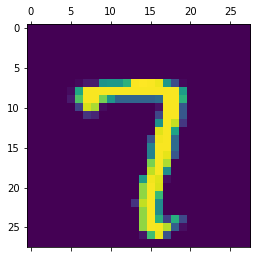

In [48]:
plt.matshow(X_train[2024])

In [50]:
y_train[2024]

7

In [72]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) /255

In [64]:
(X_train_flattened).shape

(60000, 784)

In [73]:
X_test_flattened = X_test.reshape(len(X_test), 28*28) /255

In [75]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])


In [76]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [77]:
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 654us/step - loss: 0.4703 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 1s 668us/step - loss: 0.3037 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 1s 737us/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 1s 663us/step - loss: 0.2730 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 1s 656us/step - loss: 0.2666 - accuracy: 0.9251


In [79]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 577us/step - loss: 0.2657 - accuracy: 0.9281


[0.26567259430885315, 0.9280999898910522]

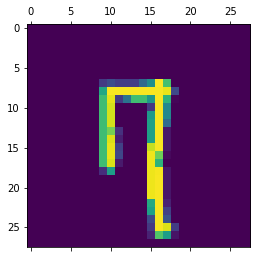

In [84]:
plt.matshow(X_test[2024])

In [85]:
y_predicted = model.predict(X_test_flattened)
y_predicted[2024]

array([0.00128049, 0.00170743, 0.01753536, 0.06238154, 0.33825862,
       0.15122604, 0.00393072, 0.9149747 , 0.10665584, 0.9706985 ],
      dtype=float32)

In [86]:
np.argmax(y_predicted[2024])

9

In [89]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [93]:
cm =tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

Text(69.0, 0.5, 'Truth')

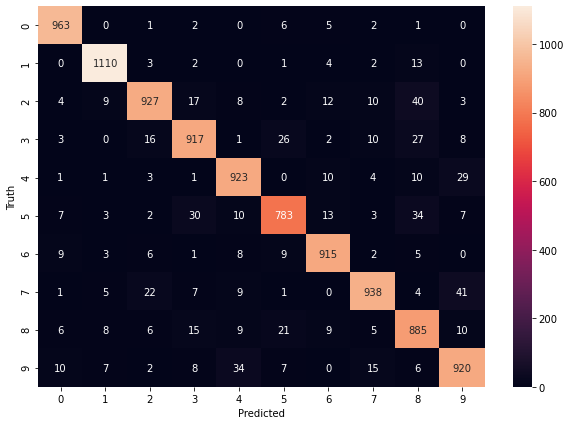

In [100]:
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [101]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [106]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [107]:
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 818us/step - loss: 0.2721 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 1s 746us/step - loss: 0.1242 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 1s 763us/step - loss: 0.0865 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0660 - accuracy: 0.9801: 0s - loss: 0.0660 
Epoch 5/5
1875/1875 [==============================] - 2s 840us/step - loss: 0.0530 - accuracy: 0.9837


In [108]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 590us/step - loss: 0.0785 - accuracy: 0.9757


[0.07854778319597244, 0.9757000207901001]

Text(69.0, 0.5, 'Truth')

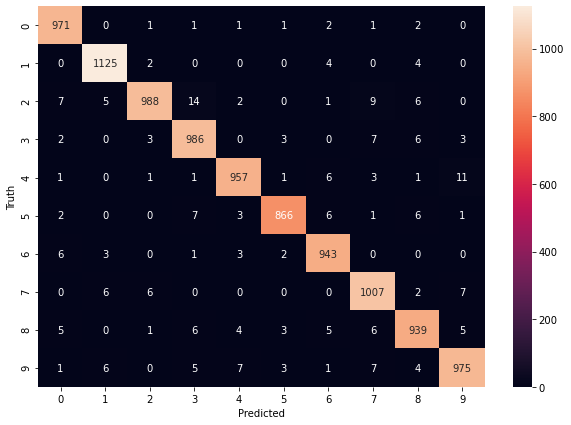

In [111]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_predicted_labels)

import seaborn as sn 

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [114]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [116]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [117]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 728us/step - loss: 2.5001 - accuracy: 0.8439
Epoch 2/5
1875/1875 [==============================] - 1s 734us/step - loss: 0.4314 - accuracy: 0.8987
Epoch 3/5
1875/1875 [==============================] - 2s 821us/step - loss: 0.3089 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 1s 743us/step - loss: 0.2659 - accuracy: 0.9337
Epoch 5/5
1875/1875 [==============================] - 2s 841us/step - loss: 0.2373 - accuracy: 0.9400


In [118]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 685us/step - loss: 0.2813 - accuracy: 0.9322


[0.2812710404396057, 0.932200014591217]

In [124]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

Text(69.0, 0.5, 'Truth')

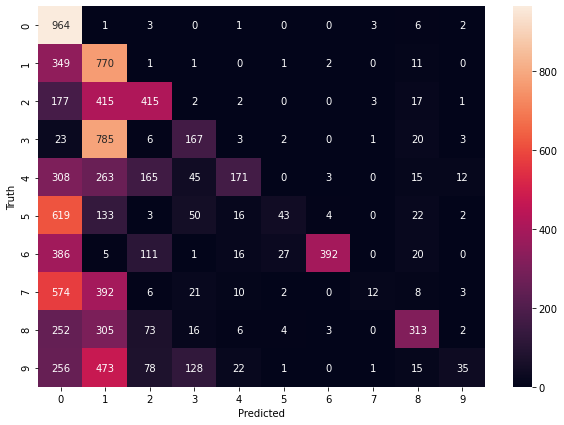

In [125]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot =True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')